In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading dataset

## Dataset

This dataset about video game sales. The dataset contains **240** objects. Each object represents a game, it's sales and ratings, which is described by **7** features.

## Features description

This is a dataset consisting of several features of stars.

Some of them are:

- Absolute Temperature (in K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Color (white,Red,Blue,Yellow,yellow-orange etc)
- Spectral Class (O,B,A,F,G,K,,M)
- Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
- Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)
- Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

In [21]:
df = pd.read_csv('star_dataset.csv')
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


Now we will get information about number of non-nulls and type of each feature

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


There is no missings in data, so we can use all objects.

Now we will change the names of some columns to simpler ones.

In [23]:
df.rename(columns={'Temperature (K)': 'Temperature', 'Luminosity(L/Lo)': 'Luminosity', 'Radius(R/Ro)':'Radius',
                  'Absolute magnitude(Mv)':'Absolute magnitude'}, inplace=True)

Now we will make dataframe X, which consists of quantitative columns

In [28]:
quantitative_columns = ['Temperature', 'Luminosity', 'Radius', 'Absolute magnitude']

X = df[quantitative_columns]
X

,Temperature,Luminosity,Radius,Absolute magnitude
0,3068,0.002400,0.1700,16.12
1,3042,0.000500,0.1542,16.60
2,2600,0.000300,0.1020,18.70
3,2800,0.000200,0.1600,16.65
4,1939,0.000138,0.1030,20.06
...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93
236,30839,834042.000000,1194.0000,-10.63
237,8829,537493.000000,1423.0000,-10.73
238,9235,404940.000000,1112.0000,-11.23


### Applying K-Means 

We apply KMeans from sklearn library with specified parameters 10 times and choose best one. We choose all 4 quantitative features ('Temperature', 'Luminosity', 'Radius', 'Absolute Magnitude') because all of them represent different parameters of stars and all of them are significant for classification and clusterisation.

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Ks = [4,7] #number of clusters

X_scaled = StandardScaler().fit_transform(X) #standardizing data

inertias = np.zeros((2,10)) #array, which contains inertias for each number of cluster (row)
                            #and for each initialization of KMeans (column)

best_inertias=[] #contains best_inertias for every cluster

j=0 #number of row in inertias
for k in Ks: #k is a number of clusters
    best_inertia = 1e10 #initial inertia
    
    for i in range(10): 
        kmeans = KMeans(n_clusters=k, n_init = 1, max_iter = 500, init='random', 
                           tol=1e-4, algorithm='full', random_state = i).fit(X_scaled) 
                        #apply KMeans 10 times with k clusters, maximum number of iterations 500
                        #random initial cluster centers, relative tolerance 0.0001, EM-style algorythm
                        # and random state i
                    
        inertias[j,i]=kmeans.inertia_
            
        tmp_labels = kmeans.labels_ #cluster labels for each object
            
        if inertias[j,i] < best_inertia: #choose the best clustering
            best_inertia = inertias[j,i] #save best_inertia
            best_labels = tmp_labels #save labels for best inertia
            best_random = i #save random_state for reproducing the results
    df['cluster_id_' + str(k)] = best_labels #sve cluster labels in additional column
    best_inertias = np.append(inertias, best_inertia)
    print("Best inertia for "+str(k)+"-cluster clustering:", best_inertia)
    print("Random state for this clustering: ", best_random)
    print()
    j+=1

Best inertia for 4-cluster clustering: 256.8953857589539
Random state for this clustering:  9

Best inertia for 7-cluster clustering: 136.50785707441952
Random state for this clustering:  2



In [13]:
print(inertias)

[[281.50641631 257.21310474 283.93293069 277.04870372 264.85695296
  282.05251763 281.50641631 281.50641631 257.21310474 256.89538576]
 [140.63433072 147.50836015 136.50785707 137.00889523 137.00889523
  137.00889523 198.68316395 137.06211114 192.15358365 137.00889523]]


### Table of inertias 


| Number of clusters |i=0|i=1|i=2|i=3|i=4|i=5|i=6|i=7|i=8|i=9|
|:------------------:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|4                   |281.5|257.21|283.93|277.05|264.86|282.05|281.51|281.51|257.21|256.9|
|7                   |140.63|147.51|136.51|137.01|137.01|137.01|198.68|137.06|192.15|137.01|

With random state 9 we have best inertia for 4 clusters.
With random state 2 we have best inertia for 7 clusters.

Now let's save new dataset with cluster labels

In [69]:
df.to_csv("Stars_with_clusters.csv")

In [7]:
categorical_columns = ["Star type", "Star color", "Spectral Class"]

In [9]:
type_unique = df["Star type"].unique() #get unique values of star types
type_num = [len(df[df["Star type"]==el]) for el in type_unique] #number of elements for every type

# Star type

Lets have a look on distribution of star types in clusters. We will use bar plot which will show what part of each type of stars is in certain cluster

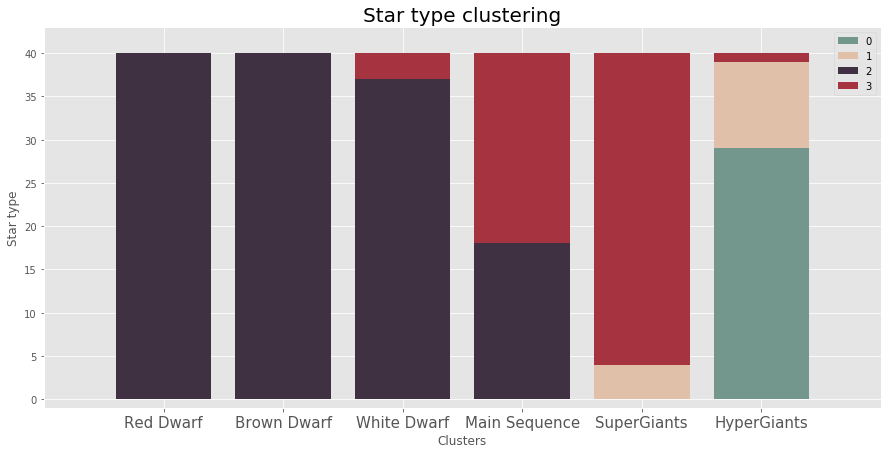

In [16]:
plt.style.use('ggplot') #define the style of plotting

plt.figure(figsize=(15,7))
type_num_for_cluster = np.array([[len(df[(df.cluster_id_4==i)&(df["Star type"] == el)]) for el in type_unique]
                                 for i in range(4)]) #counting how many objects in each type belong to each cluster

# plotting bar graph with defined label and color
plt.bar(type_unique, type_num_for_cluster[0], label='0', color='#73978C')
plt.bar(type_unique, type_num_for_cluster[1], bottom=type_num_for_cluster[0], label ='1', color='#E1C0A9')
plt.bar(type_unique, type_num_for_cluster[2], bottom=type_num_for_cluster[1]+type_num_for_cluster[0], label ='2',
       color='#403142')
plt.bar(type_unique, type_num_for_cluster[3],
       bottom=type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0], label ='3', color='#A63340')

plt.legend() #define the legend
plt.xticks(type_unique, ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'SuperGiants', 'HyperGiants'],
           fontsize = 15, fontweight=400) #define the names of ticks (names of bars)

#define labels of axes
plt.ylabel("Star type")
plt.xlabel("Clusters")

plt.title("Star type clustering", fontsize = 20) #define title of the graph

#set limits of axes display
plt.gca().set_ylim(-1,43)
plt.gca().set_xlim(-1,6)

#show the graph
plt.show()

Now we will make the same graph for 7 cluster separation

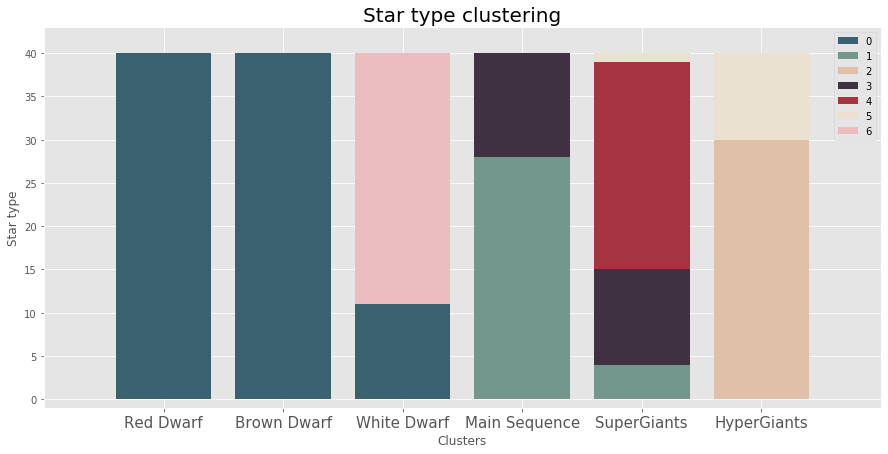

In [17]:
fig, ax = plt.subplots(figsize = (15,7)) #define the style of plotting
    
type_num_for_cluster = np.array([[len(df[(df.cluster_id_7==i)&(df["Star type"] == el)]) for el in type_unique]
                                 for i in range(7)]) #counting how many objects in each type belong to each cluster

# plotting bar graph with defined label and color
ax.bar(type_unique, type_num_for_cluster[0], label='0', color='#3a6170')
ax.bar(type_unique, type_num_for_cluster[1], bottom=type_num_for_cluster[0], label ='1', color = '#73978C')
ax.bar(type_unique, type_num_for_cluster[2], bottom=type_num_for_cluster[1]+type_num_for_cluster[0], label ='2',
       color='#E1C0A9')
ax.bar(type_unique, type_num_for_cluster[3],
       bottom=type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0], label ='3', color='#403142')
ax.bar(type_unique, type_num_for_cluster[4],
       bottom=type_num_for_cluster[3]+type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0],
       label ='4', color='#A63340')
ax.bar(type_unique, type_num_for_cluster[5],
       bottom=type_num_for_cluster[4]+type_num_for_cluster[3]+type_num_for_cluster[2]+
       type_num_for_cluster[1]+type_num_for_cluster[0],label ='5', color='#EAE1D0')
ax.bar(type_unique, type_num_for_cluster[6],
       bottom=type_num_for_cluster[5]+type_num_for_cluster[4]+type_num_for_cluster[3]+
       type_num_for_cluster[2]+type_num_for_cluster[1]+type_num_for_cluster[0], label ='6', color ='#ebbcc0')

plt.legend() #define the legend

plt.xticks(type_unique, ['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'SuperGiants', 'HyperGiants'],
           fontsize = 15, fontweight=400) #define the names of ticks (names of bars)

#define labels of axes
plt.ylabel("Star type")
plt.xlabel("Clusters")

plt.title("Star type clustering", fontsize = 20) #define title of the graph

#set limits of axes display
plt.gca().set_ylim(-1,43)
plt.gca().set_xlim(-1,6)

#show the graph
plt.show()

## Relative difference

#### 4 clusters

In [3]:
df_cluster = pd.read_csv("Stars_with_clusters.csv")

Mean

In [82]:
relative_difference_4 = np.zeros((4,4))
for j, feature in enumerate(quantitative_columns):
    grand_mean = np.mean(df_cluster[feature])
    for i in range(4):
        relative_difference_4[i,j] = round(100*(np.mean(df_cluster[df_cluster["cluster_id_4"]==i][feature])/grand_mean-1),2)

In [83]:
relative_difference_4

array([[ -53.53,  134.18,  476.37, -326.93],
       [ 171.34,  423.36,  337.89, -288.59],
       [ -39.18,  -99.99,  -99.85,  192.51],
       [  71.66,   59.37,  -81.71, -201.09]])


| |Temperature|Luminosity|Radius|Absolute magnitude|
|:------------------:|:-:|:-:|:-:|:-:|
|Relative difference for cluster "0"|-53.53|134.18|476.36|-327.05|
|Relative difference for cluster "1"|171.34|423.36|337.89|-288.69|
|Relative difference for cluster "2"|-39.18|-99.99|-99.85|192.67|
|Relative difference for cluster "3"|71.66|59.37|-81.71|-201.15|

#### 7 clusters

In [84]:
relative_difference_7 = np.zeros((7,4))
for j, feature in enumerate(quantitative_columns):
    grand_mean = np.mean(df_cluster[feature])
    for i in range(7):
        relative_difference_7[i,j] = round(100*(np.mean(df_cluster[df_cluster["cluster_id_7"]==i][feature])/grand_mean-1),2)

In [85]:
relative_difference_7

array([[ -64.35, -100.  ,  -99.91,  241.32],
       [  -9.93,  -84.26,  -96.54,  -94.11],
       [ -51.24,  130.11,  467.12, -325.33],
       [ 171.  ,   56.89,  -88.37, -213.82],
       [   2.32,  216.21,  -76.95, -249.08],
       [ 196.75,  390.51,  449.73, -299.48],
       [  53.71, -100.  , -100.  ,  172.46]])


| |Temperature|Luminosity|Radius|Absolute magnitude|
|:------------------:|:-:|:-:|:-:|:-:|
|Relative difference for cluster "0"|-64.35|-100|-99.91|241.32|
|Relative difference for cluster "1"|-9.93|-84.26|-96.54|-94.11|
|Relative difference for cluster "2"|-51.24|130.11|467.12|-325.33|
|Relative difference for cluster "3"|171|56.89|-88.37|-213.82|
|Relative difference for cluster "4"|2.32|216.21|-76.95|-249.08|
|Relative difference for cluster "5"|196.75|390.51|449.73|-299.48|
|Relative difference for cluster "6"|53.71|-100|-100|172.46|

## Quetelet indeces

In [8]:
print(categorical_columns)

['Star type', 'Star color', 'Spectral Class']


In [9]:
types = df_cluster["Star type"].unique()
print(types)
print(len(types))

[0 1 2 3 4 5]
6


In [10]:
colors = df_cluster["Star color"].unique()
print(colors)
print(len(colors))

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']
19


In [11]:
classes = df_cluster["Spectral Class"].unique()
print(classes)
print(len(classes))

['M' 'B' 'A' 'F' 'O' 'K' 'G']
7


### 4 clusters

#### types

In [125]:
quetelet_indeces_types_4 = np.zeros((4,6))
for j, cat in enumerate(types):
    for i in range(4):
        p_kv = len(df_cluster[(df_cluster["cluster_id_4"]==i)&(df_cluster["Star type"]==cat)])/240.
        p_k = len(df_cluster[df_cluster["cluster_id_4"]==i])/240.
        p_v = len(df_cluster[df_cluster["Star type"]==cat])/240.
        quetelet_indeces_types_4[i,j] = round(100*(p_kv/(p_k*p_v)-1),2)

In [126]:
quetelet_indeces_types_4

array([[-100.  , -100.  , -100.  , -100.  , -100.  ,  500.  ],
       [-100.  , -100.  , -100.  , -100.  ,   71.43,  328.57],
       [  77.78,   77.78,   64.44,  -20.  , -100.  , -100.  ],
       [-100.  , -100.  ,  -70.97,  112.9 ,  248.39,  -90.32]])

                                                   Quelet indeces for star type
| |0 - Red Dwarf|1 - Brown Dwarf|2 - White Dwarf|3 - Main Sequence|4 - SuperGiants|5 - HyperGiants|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|-100|-100|-100|-100|-100|500|
|Quetelet index for cluster "1"|-100|-100|-100|-100|71.43|328.57|
|Quetelet index for cluster "2"|77.78|77.78|64.44|-20|-100|-100|
|Quetelet index for cluster "3"|-100|-100|-70.97|112.9|248.39|-90.32|


#### colors

In [127]:
quetelet_indeces_colors_4 = np.zeros((4,19))
for j, cat in enumerate(colors):
    for i in range(4):
        p_kv = len(df_cluster[(df_cluster["cluster_id_4"]==i)&(df_cluster["Star color"]==cat)])/240
        p_k = len(df_cluster[df_cluster["cluster_id_4"]==i])/240.
        p_v = len(df_cluster[df_cluster["Star color"]==cat])/240.
        quetelet_indeces_colors_4[i,j] = round(100*(p_kv/(p_k*p_v)-1),2)

In [128]:
quetelet_indeces_colors_4

array([[  69.95, -100.  ,  136.45, -100.  , -100.  , -100.  ,  -84.95,
         -68.17, -100.  , -100.  ,  727.59, -100.  , -100.  , -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ],
       [-100.  , -100.  , -100.  , -100.  , -100.  , -100.  ,  211.69,
         163.74, -100.  , -100.  , -100.  , -100.  , -100.  , -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ],
       [  26.98,   60.  ,   26.98,   77.78,   77.78,   77.78,  -67.68,
         -79.49,   77.78,   77.78, -100.  ,   77.78,   77.78,   77.78,
          77.78,   77.78,   77.78,   77.78,   77.78],
       [ -68.89,  -61.29, -100.  , -100.  , -100.  , -100.  ,  139.3 ,
         167.99, -100.  , -100.  , -100.  , -100.  , -100.  , -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ]])

                                                   Quelet indeces for star color
||Red|Blue White|White|Yellowish White|Blue white|Pale yellow orange|Blue|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|69.955|-100|136.45|-100|-100|-100|-84.95|
|Quetelet index for cluster "1"|-100|-100|-100|-100|-100|-100|211.69|
|Quetelet index for cluster "2"|26.98|60|26.98|77.78|77.78|77.78|-67.68|
|Quetelet index for cluster "3"|-68.89|-61.29|-100|-100|-100|-100|139.3|

||Blue-white|Whitish|yellow-white|Orange|White-Yellow|white|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|-68.17|-100|-100|727.59|-100|-100|
|Quetelet index for cluster "1"|163.74|-100|-100|-100|-100|-100|
|Quetelet index for cluster "2"|-79.49|77.78|77.78|-100|77.78|77.78|
|Quetelet index for cluster "3"|167.99|-100|-100|-100|-100|-100|

||Blue|yellowish|Yellowish|Orange-Red|Blue white|Blue-White|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "1"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "2"|77.78|77.78|77.78|77.78|77.78|77.78|
|Quetelet index for cluster "3"|-100|-100|-100|-100|-100|-100|

#### classes

In [123]:
quetelet_indeces_classes_4 = np.zeros((4,7))
for j, cat in enumerate(classes):
    for i in range(4):
        p_kv = len(df_cluster[(df_cluster["cluster_id_4"]==i)&(df_cluster["Spectral Class"]==cat)])/240.
        p_k = len(df_cluster[df_cluster["cluster_id_4"]==i])/240.
        p_v = len(df_cluster[df_cluster["Spectral Class"]==cat])/240.
        quetelet_indeces_classes_4[i,j] = round(100*(p_kv/(p_k*p_v)-1),2)

In [124]:
quetelet_indeces_classes_4

array([[  64.03,  -82.01,  -12.89, -100.  ,  -79.31,  175.86,  727.59],
       [-100.  ,   86.34, -100.  , -100.  ,  285.71, -100.  , -100.  ],
       [  28.13,  -14.98,   12.28,   77.78, -100.  ,   18.52, -100.  ],
       [ -68.61,   51.47,    1.87, -100.  ,  190.32, -100.  , -100.  ]])

                                                   Quelet indeces for spectral classes
| |M|B|A|F|O|K|G|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|64.03|-82.01|-12.89|-100|-79.31|175.86|727.59|
|Quetelet index for cluster "1"|-100|86.34|-100|-100|285.71|-100|-100|
|Quetelet index for cluster "2"|28.13|-14.98|12.28|77.78|-100|18.52|-100|
|Quetelet index for cluster "3"|-68.61|51.47|1.87|-100|190.32|-100|-100|


### 7 clusters

#### types

In [12]:
quetelet_indeces_types_7 = np.zeros((7,6))
for j, cat in enumerate(types):
    for i in range(7):
        p_kv = len(df_cluster[(df_cluster["cluster_id_7"]==i)&(df_cluster["Star type"]==cat)])/240.
        p_k = len(df_cluster[df_cluster["cluster_id_7"]==i])/240.
        p_v = len(df_cluster[df_cluster["Star type"]==cat])/240.
        quetelet_indeces_types_7[i,j] = round(100*(p_kv/(p_k*p_v)-1),2)

In [13]:
quetelet_indeces_types_7

array([[ 163.74,  163.74,  -27.47, -100.  , -100.  , -100.  ],
       [-100.  , -100.  , -100.  ,  425.  ,  -25.  , -100.  ],
       [-100.  , -100.  , -100.  , -100.  , -100.  ,  500.  ],
       [-100.  , -100.  , -100.  ,  213.04,  186.96, -100.  ],
       [-100.  , -100.  , -100.  , -100.  ,  500.  , -100.  ],
       [-100.  , -100.  , -100.  , -100.  ,  -45.45,  445.45],
       [-100.  , -100.  ,  500.  , -100.  , -100.  , -100.  ]])


| |Temperature|Luminosity|Radius|Absolute magnitude|
|:------------------:|:-:|:-:|:-:|:-:|
|Relative difference for cluster "0"|-64.35|-100|-99.91|241.32|
|Relative difference for cluster "1"|-9.93|-84.26|-96.54|-94.11|
|Relative difference for cluster "2"|-51.24|130.11|467.12|-325.33|
|Relative difference for cluster "3"|171|56.89|-88.37|-213.82|
|Relative difference for cluster "4"|2.32|216.21|-76.95|-249.08|
|Relative difference for cluster "5"|196.75|390.51|449.73|-299.48|
|Relative difference for cluster "6"|53.71|-100|-100|172.46|

                                                   Quelet indeces for star type
| |0 - Red Dwarf|1 - Brown Dwarf|2 - White Dwarf|3 - Main Sequence|4 - SuperGiants|5 - HyperGiants|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|163.74|163.74|-27.47|-100|-100|-100|
|Quetelet index for cluster "1"|-100|-100|-100|425|-25|-100|
|Quetelet index for cluster "2"|-100|-100|-100|-100|-100|500|
|Quetelet index for cluster "3"|-100|-100|-100|213.04|186.96|-100|
|Quetelet index for cluster "4"|-100|-100|-100|-100|500|-100|
|Quetelet index for cluster "5"|-100|-100|-100|-100|-45.45|445.45|
|Quetelet index for cluster "6"|-100|-100|500|-100|-100|-100|

#### colors

In [14]:
quetelet_indeces_colors_7 = np.zeros((7,19))
for j, cat in enumerate(colors):
    for i in range(7):
        p_kv = len(df_cluster[(df_cluster["cluster_id_7"]==i)&(df_cluster["Star color"]==cat)])/240
        p_k = len(df_cluster[df_cluster["cluster_id_7"]==i])/240.
        p_v = len(df_cluster[df_cluster["Star color"]==cat])/240.
        quetelet_indeces_colors_7[i,j] = round(100*(p_kv/(p_k*p_v)-1),2)

In [15]:
quetelet_indeces_colors_7

array([[  88.38,  -73.63,   50.71,  -12.09,   75.82,  163.74, -100.  ,
        -100.  , -100.  , -100.  , -100.  ,  163.74,  -12.09, -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ],
       [ -86.61, -100.  , -100.  , -100.  , -100.  , -100.  ,  -72.73,
         275.  ,  650.  ,  650.  , -100.  , -100.  , -100.  , -100.  ,
         650.  ,  650.  ,  650.  , -100.  ,  650.  ],
       [  64.29, -100.  ,  128.57, -100.  , -100.  , -100.  ,  -85.45,
         -38.46, -100.  , -100.  ,  700.  , -100.  , -100.  , -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ],
       [-100.  , -100.  , -100.  , -100.  , -100.  , -100.  ,  203.56,
         180.94, -100.  , -100.  , -100.  , -100.  , -100.  , -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ],
       [ -37.5 , -100.  , -100.  , -100.  , -100.  , -100.  ,  209.09,
        -100.  , -100.  , -100.  , -100.  , -100.  , -100.  , -100.  ,
        -100.  , -100.  , -100.  , -100.  , -100.  ],
       [-100.  , -10

                                                   Quelet indeces for star color
||Red|Blue White|White|Yellowish White|Blue white|Pale yellow orange|Blue|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|88.38|-73.63|50.71|-12.09|75.82|163.74|-100|
|Quetelet index for cluster "1"|-86.61|-100|-100|-100|-100|-100|-72.73|
|Quetelet index for cluster "2"|64.29|-100|128.57|-100|-100|-100|-85.45|
|Quetelet index for cluster "3"|-68.89|-61.29|-100|-100|-100|-100|139.3|
|Quetelet index for cluster "4"|-37.5|-100|-100|-100|-100|-100|209.09|
|Quetelet index for cluster "5"|-100|-100|-100|-100|-100|-100|177.69|
|Quetelet index for cluster "6"|-100|644.83|18.23|451.72|175.86|-100|80.56|

||Blue-white|Whitish|yellow-white|Orange|White-Yellow|white|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|-100|-100|-100|-100|163.74|-12.09|
|Quetelet index for cluster "1"|275|650|650|-100|-100|-100|
|Quetelet index for cluster "2"|-38.46|-100|-100|700|-100|-100|
|Quetelet index for cluster "3"|167.99|-100|-100|-100|-100|-100|
|Quetelet index for cluster "4"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "5"|235.66|-100|-100|-100|-100|-100|
|Quetelet index for cluster "6"|-100|-100|-100|-100|-100|451.72|

||Blue|yellowish|Yellowish|Orange-Red|Blue white|Blue-White|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "1"|-100|650|650|650|-100|650|
|Quetelet index for cluster "2"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "3"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "4"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "5"|-100|-100|-100|-100|-100|-100|
|Quetelet index for cluster "6"|727.59|-100|-100|-100|727.59|-100|

#### classes

In [16]:
quetelet_indeces_classes_7 = np.zeros((7,7))
for j, cat in enumerate(classes):
    for i in range(7):
        p_kv = len(df_cluster[(df_cluster["cluster_id_7"]==i)&(df_cluster["Spectral Class"]==cat)])/240.
        p_k = len(df_cluster[df_cluster["cluster_id_7"]==i])/240.
        p_v = len(df_cluster[df_cluster["Spectral Class"]==cat])/240.
        quetelet_indeces_classes_7[i,j] = round(100*(p_kv/(p_k*p_v)-1),2)

In [17]:
quetelet_indeces_classes_7

array([[  90.08, -100.  ,   -2.83,  -37.94, -100.  , -100.  , -100.  ],
       [ -86.49,   -2.17,  294.74,  252.94,  -62.5 ,  400.  , -100.  ],
       [  58.56,  -65.22,  -15.79, -100.  ,  -80.  ,  166.67,  700.  ],
       [-100.  ,  104.16, -100.  , -100.  ,  265.22, -100.  , -100.  ],
       [ -36.94, -100.  , -100.  , -100.  ,  325.  , -100.  , -100.  ],
       [-100.  ,  137.15, -100.  , -100.  ,  227.27, -100.  , -100.  ],
       [-100.  ,  331.78, -100.  ,  143.41, -100.  , -100.  , -100.  ]])

                                                   Quelet indeces for spectral classes
| |M|B|A|F|O|K|G|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|Quetelet index for cluster "0"|90.08|-100|-2.83|-37.94|-100|-100|-100.|
|Quetelet index for cluster "1"|-86.49|-2.17|294.74|252.94|-62.5|400|-100|
|Quetelet index for cluster "2"|58.56|-65.22|-15.79|-100|-80|166.67|700|
|Quetelet index for cluster "3"|-100|104.16|-100|-100|265.22|-100|-100|
|Quetelet index for cluster "4"|-36.94|-100|-100|-100|325|-100|-100|
|Quetelet index for cluster "5"|-100|137.15|-100|-100|227.27|-100|-100|
|Quetelet index for cluster "6"|-100|331.78|-100|143.41|-100|-100|-100|
